## Business Case Analysis:

Find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price. In this problem you do not have to predict the actual price but a price range indicating how high the price is.

## Domain Analysis

As science and technology is advancing by leaps and bounds, mobile phones have become part and parcel of people's life. Because the different models of mobile phones which have different structural foundations, the prices of mobile phones are constantly fluctuating. Mobile phone prices forecasts are becoming more precise as artificial intelligence develops. 
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

## Dataset description:

Input Variables:

battery_power = Total energy a battery can store in one time measured in mAh(Continuous)
blue = Has bluetooth or not (Categorical)
clock_speed = speed at which microprocessor executes instructions(Continuous)
dual_sim = Has dual sim support or not (Categorical)
fc = Front Camera mega pixels(Continuous)
four_g = Has 4G or not (Categorical)
int_memory = Internal Memory in Gigabytes(Continuous)
m_dep = Mobile Depth in cm(Continuous)
mobile_wt = Weight of mobile phone(Continuous)
n_cores = Number of cores of processor(Continuous)
pc = Primary Camera mega pixels(Continuous)
px_height = Pixel Resolution Height(Continuous)
px_weight = Pixel Resolution Weight(Continuous)
ram = Random Access Memory in Megabytes(Continuous)
sc_h = Screen Height of mobile in cm(Continuous)
sc_w = Screen Width of mobile in cm(Continuous)
talk_time = longest time that a single battery charge will last when you are(Continuous)
three_g = Has 3G or not (Categorical)
touch_screen = Has touch screen or not (Categorical)
wifi = Has wifi
 or not(Categorical)
Output Variables
Price Range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Import Libraries and Load the Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data import & pre-processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


# cross validation
from sklearn.model_selection import cross_val_score

# Model evaluation metrics

from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,log_loss


In [2]:
df=pd.read_csv('datasets_11167_15520_train.csv')

In [3]:
pd.set_option('display.max_columns' ,None)

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## EDA(Exploratory Data Analysis)

### Basic Checks

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [8]:
df.shape

(2000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


There are some features like sc_w, fc, pc, px_height, these columns shows minimum value 0,so it seems like these features has corrupted values.

### Univariant Analysis

#### Distribution of price_range (target variable)

In [11]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

The dataset balanced with having equal number of obervations and accuracy score metric is good for evaluation

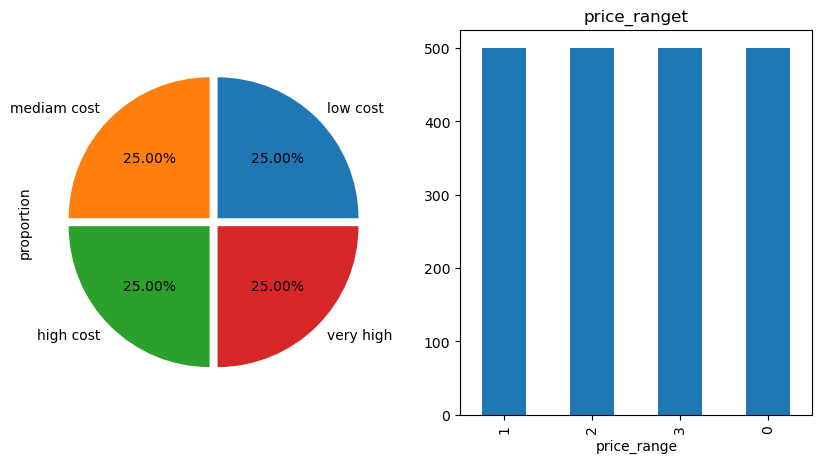

In [12]:
fig, ax =plt.subplots(ncols=2, figsize=(10, 5))

df.price_range.value_counts(normalize=True).plot.pie(autopct = "%0.2f%%",explode = [0.04]*4, labels=['low cost','mediam cost','high cost','very high'],ax=ax[0])

df.price_range.value_counts().plot(kind='bar',ax=ax[1])

plt.title('price_ranget')

plt.show()

In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df_cat=df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]

In [15]:
df_num=df[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]

In [16]:
df_cat

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [17]:
df_num

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


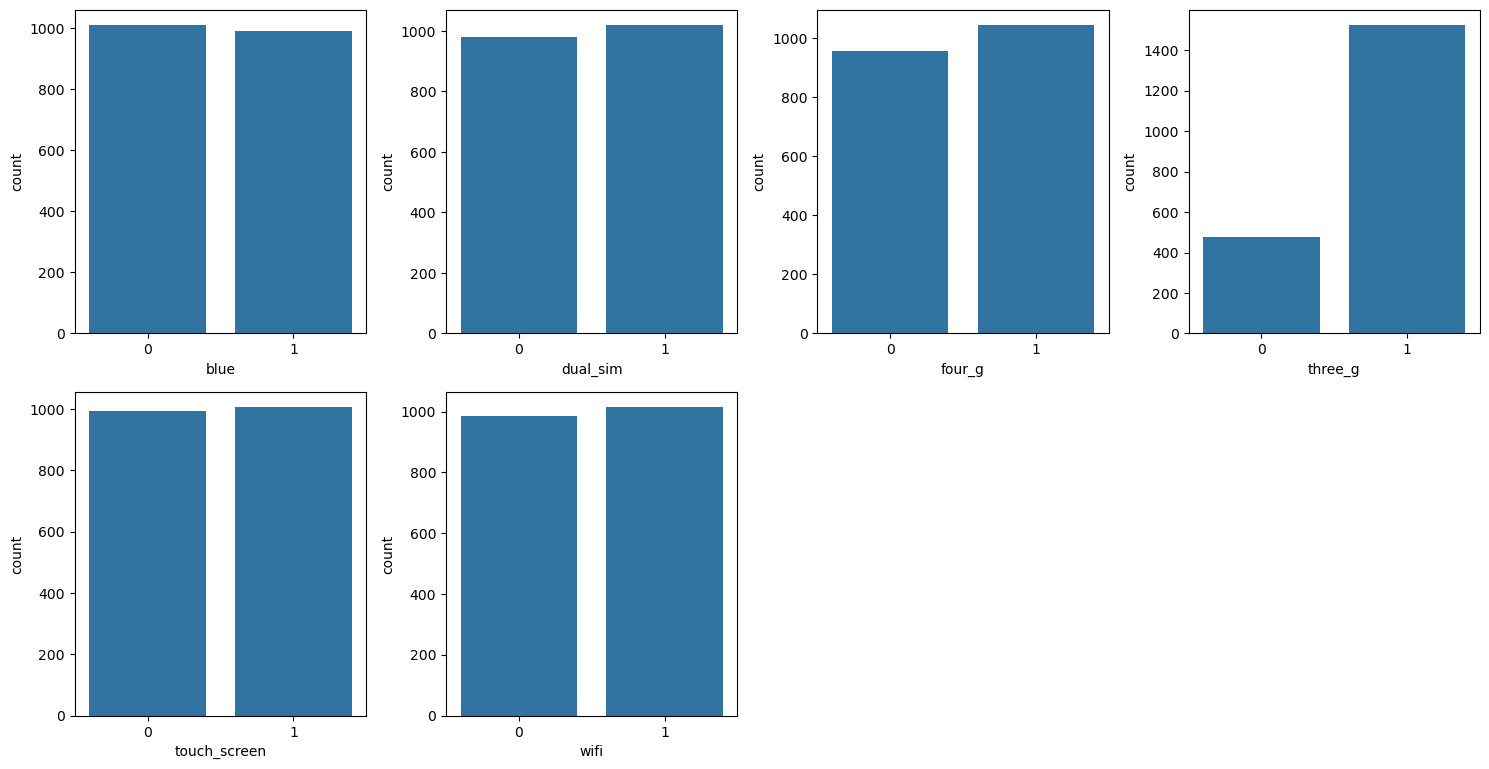

In [18]:
## Categorical univariant analysis in countplot

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_cat:
    plt.subplot(4, 4, plotnumber)
    sns.countplot(x = df_cat[i])
    plotnumber = plotnumber+1
plt.tight_layout()

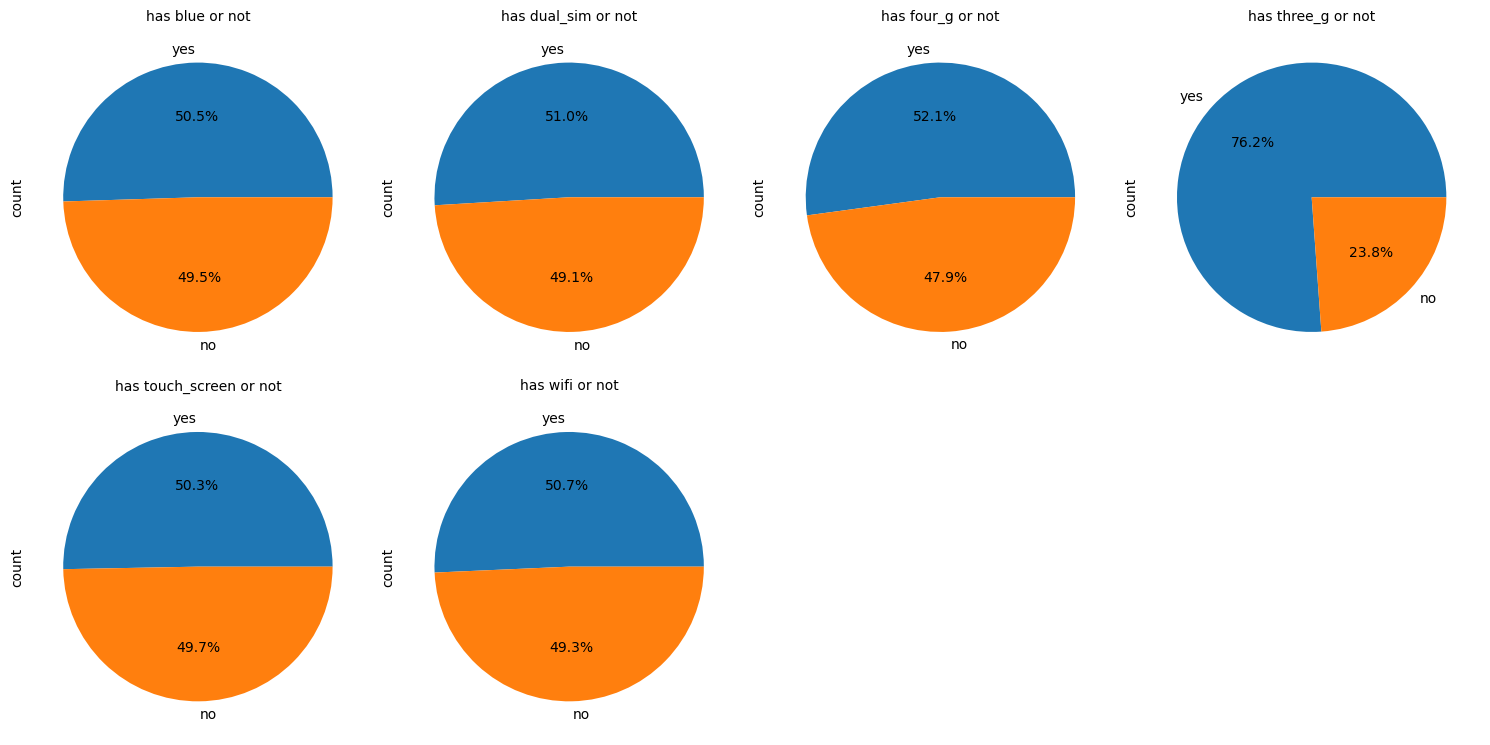

In [19]:
## Categorical univariant analysis in piechart
plt.figure(figsize=(15,15))
rows=4
colums=4
count=1
labels=['yes','no']
for i in df_cat:
    plt.subplot(rows,colums,count)
    df_cat[i].value_counts().plot.pie(autopct = '%1.1f%%', fontsize=10,labels=labels)
    plt.title(f'has {i} or not',fontsize=10 )
    count=count+1
    plt.tight_layout()

The binary class(yes or no) of bluetooth,dual sim support,touch screen ,wifi have almost equal percentage
Where the 3G support phones having 76% in overall phones

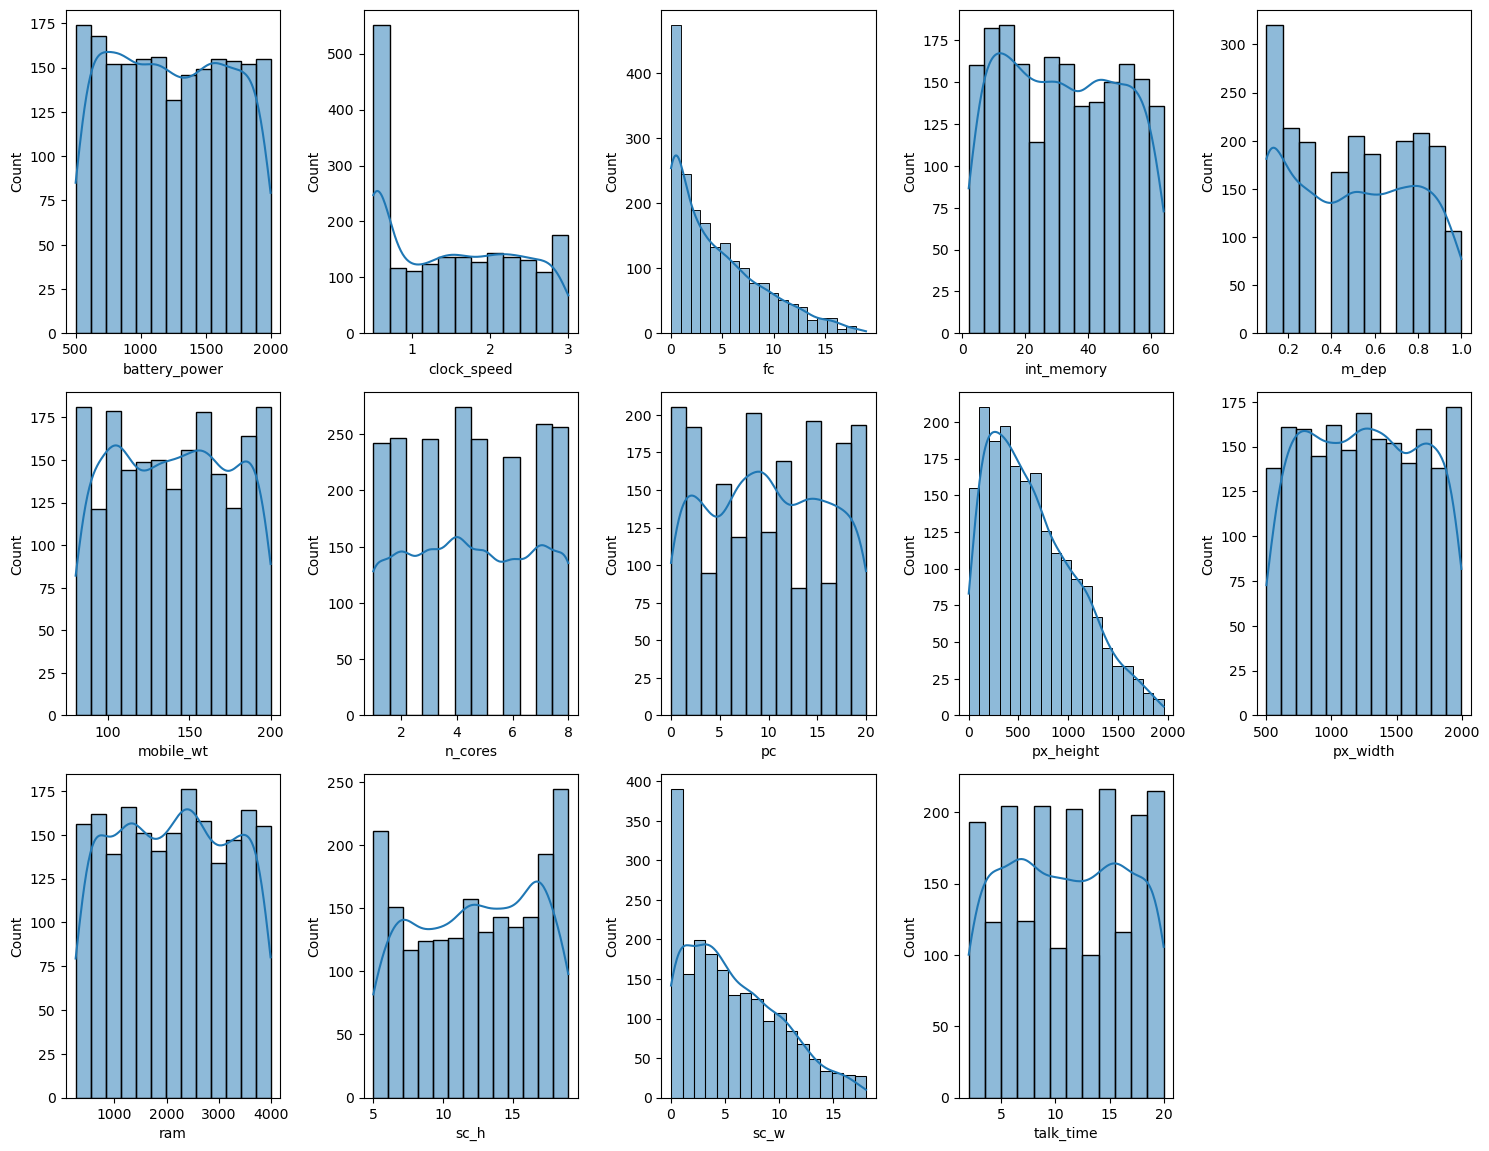

In [20]:
## Numerical univariant analysis

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(4, 5, plotnumber)
    sns.histplot(x = df_num[i],kde = True)
    plotnumber = plotnumber+1
plt.tight_layout()

In [21]:
####import sweetviz for getting insights
##sv = sweetviz.analyze(df_num)
###sv.show_html()  # Generate default argument

#### Bi-variant analysis

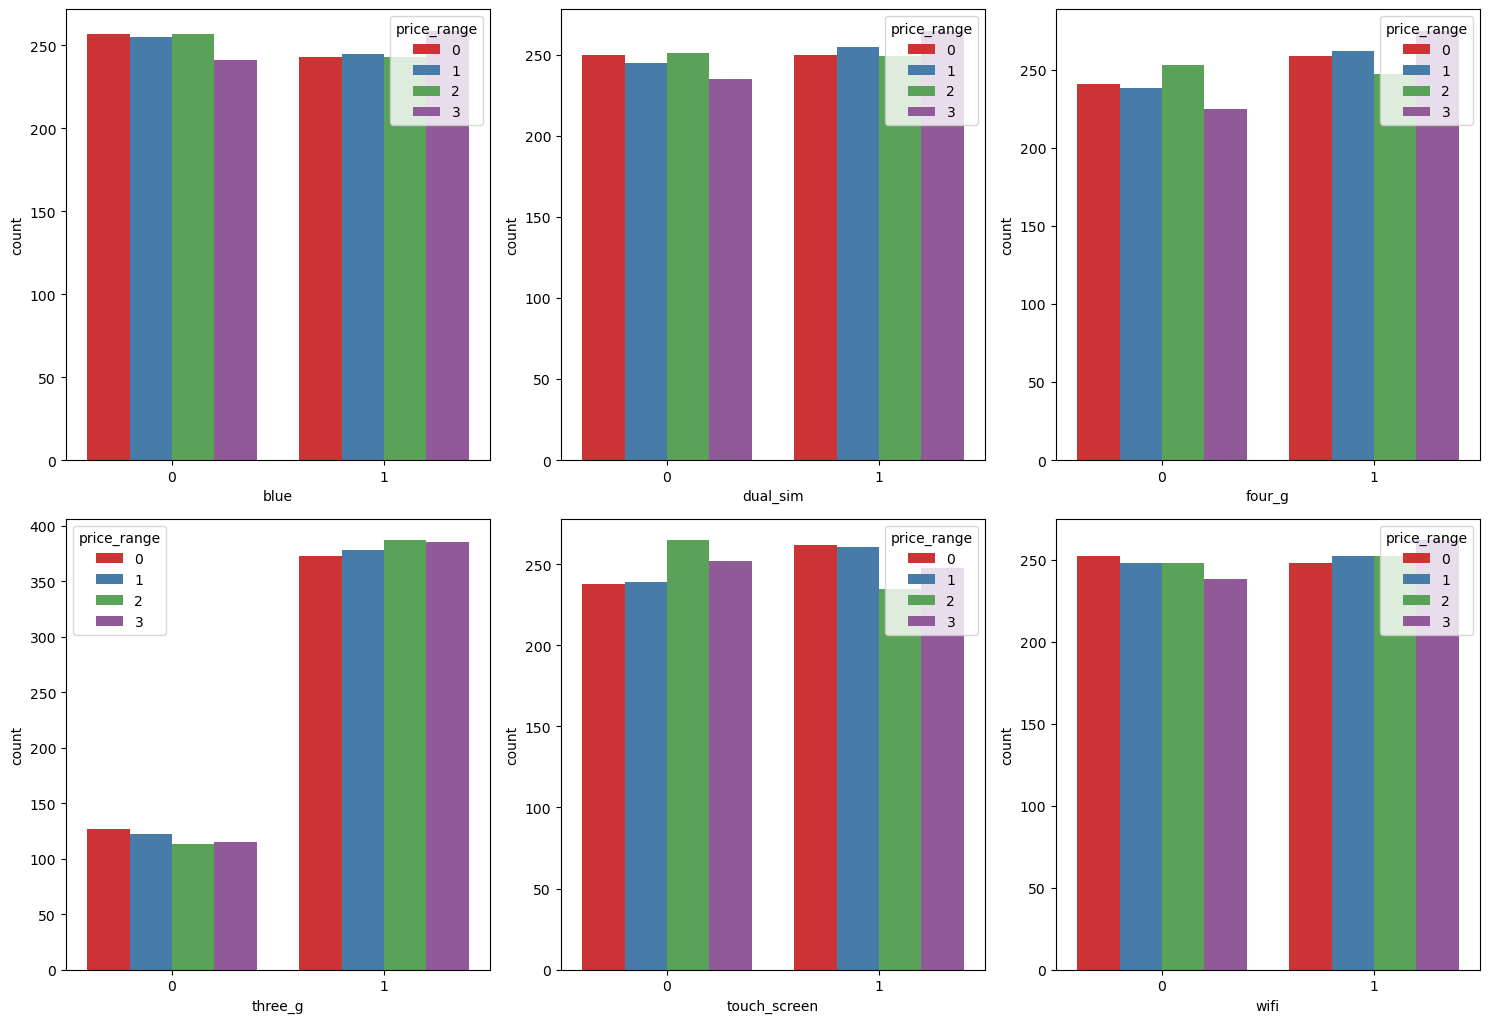

In [22]:

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_cat:
    plt.subplot(3, 3, plotnumber)
    sns.countplot(x = df_cat[i],hue=df.price_range,palette="Set1")
    plotnumber = plotnumber+1
plt.tight_layout()

In [23]:
df.groupby('blue')['price_range'].value_counts()

blue  price_range
0     0              257
      2              257
      1              255
      3              241
1     3              259
      1              245
      0              243
      2              243
Name: count, dtype: int64

In [24]:
df.groupby('dual_sim')['price_range'].value_counts()

dual_sim  price_range
0         2              251
          0              250
          1              245
          3              235
1         3              265
          1              255
          0              250
          2              249
Name: count, dtype: int64

In [25]:
df.groupby('four_g')['price_range'].value_counts()

four_g  price_range
0       2              253
        0              241
        1              238
        3              225
1       3              275
        1              262
        0              259
        2              247
Name: count, dtype: int64

In [26]:
df.groupby('three_g')['price_range'].value_counts()

three_g  price_range
0        0              127
         1              122
         3              115
         2              113
1        2              387
         3              385
         1              378
         0              373
Name: count, dtype: int64

In [27]:
df.groupby('touch_screen')['price_range'].value_counts()

touch_screen  price_range
0             2              265
              3              252
              1              239
              0              238
1             0              262
              1              261
              3              248
              2              235
Name: count, dtype: int64

In [28]:
df.groupby('wifi')['price_range'].value_counts()

wifi  price_range
0     0              252
      1              248
      2              248
      3              238
1     3              262
      1              252
      2              252
      0              248
Name: count, dtype: int64

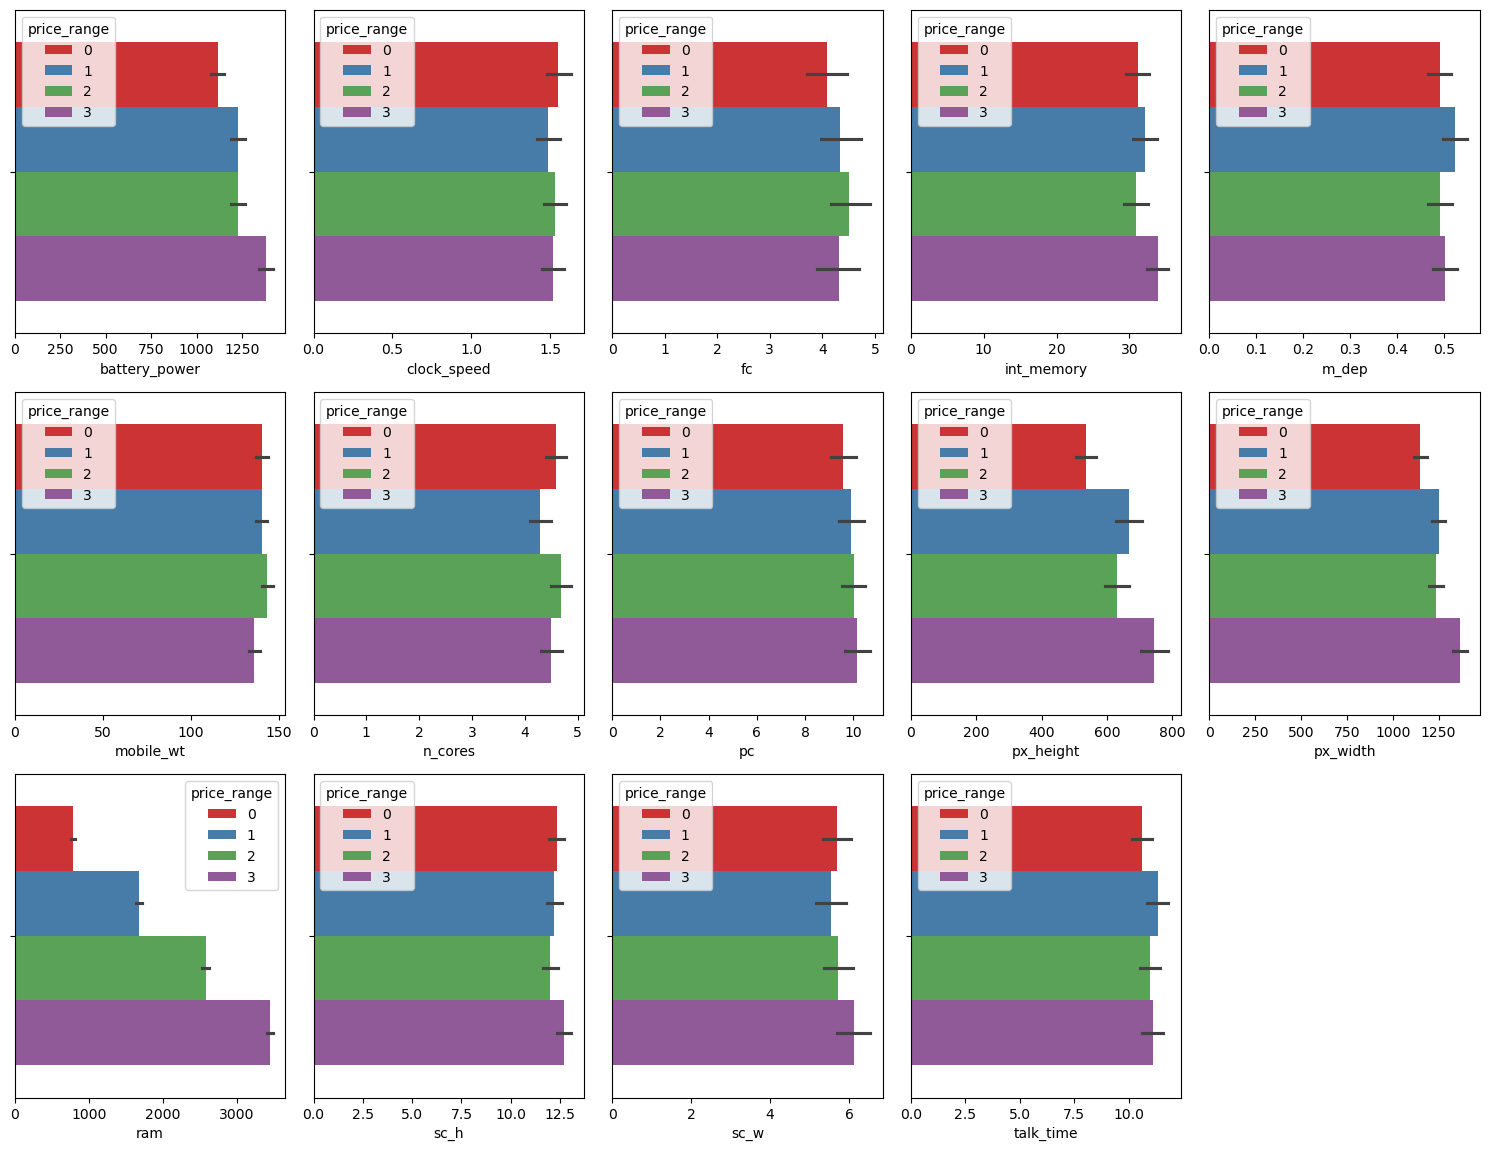

In [29]:
## Numerical univariant barplot analysis 

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(4, 5, plotnumber)
    sns.barplot(x = df_num[i],hue=df.price_range,palette="Set1")
    plotnumber = plotnumber+1
plt.tight_layout()

As Battery power increases price of phone increases.
As Internal memory increases price of phone increases.
As px_width and px_height increases price of phone increases.
As ram price of phone increases.

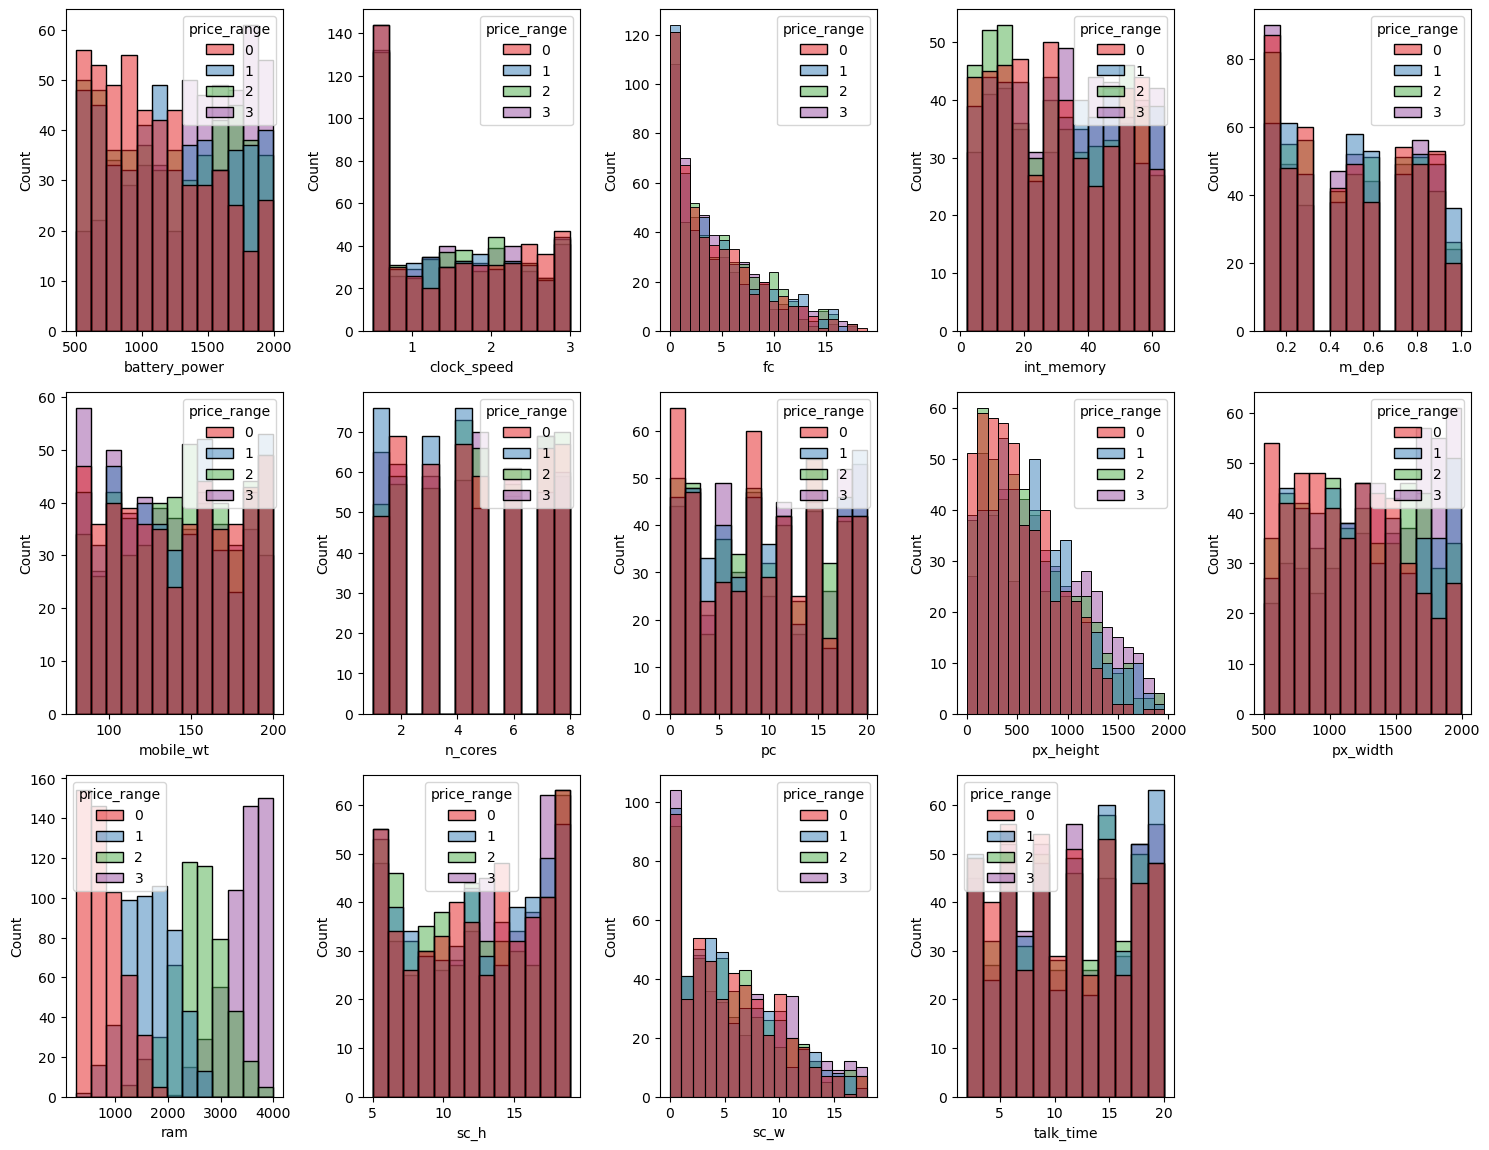

In [30]:
## Numerical univariant histplot analysis

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(4, 5, plotnumber)
    sns.histplot(x = df_num[i],hue=df.price_range,palette="Set1")
    plotnumber = plotnumber+1
plt.tight_layout()

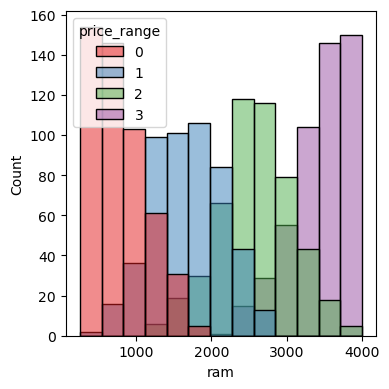

In [31]:
plt.figure(figsize=(4,4))
sns.histplot(x=df.ram,hue=df.price_range,palette="Set1")
plt.tight_layout()

As ram increases the price of phone increasing, so strong relation between ram and price.

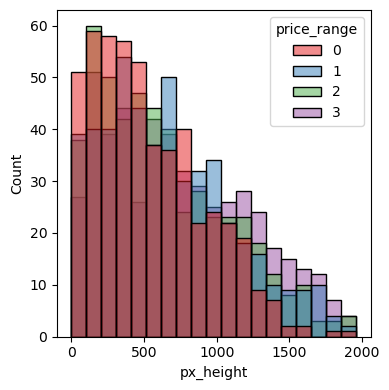

In [32]:
plt.figure(figsize=(4,4))
sns.histplot(x = df.px_height,hue=df.price_range,palette="Set1")
plt.tight_layout()

As Pixel Resolution Height increases the price of phone increasing

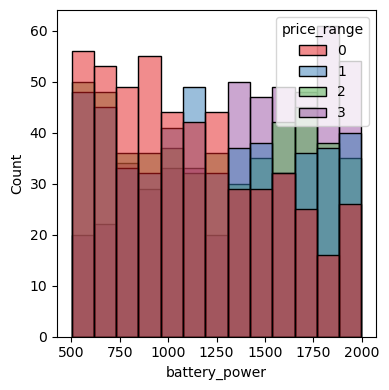

In [33]:
plt.figure(figsize=(4,4))
sns.histplot(x = df.battery_power,hue=df.price_range,palette="Set1")
plt.tight_layout()

As Batery power increases the price of phone increasing

## Data preprocessing

#### Handling with null values

In [34]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Handling with corrupted data

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


However, the variables front camera(fc), primary camera(pc) having 0 as an entry can bes assumed that the mobile doesn't have front/rear camera.
But the other two variables pixel height(px_height) and screen_width(sc_w) can't have 0 as their values.
Hence, these must be marked as corrupted.

In [36]:
len(df.loc[df['fc']==0])/len(df)

0.237

Approx 23% records has 0 value in fc column
so keeping it as it is

In [37]:
len(df.loc[df['pc']==0])/len(df) 

0.0505

In [38]:
len(df.loc[(df['four_g']==1) & (df['pc']== 0)])

59

4G mobiles without primary camera, which is generally not seen present days

In [39]:
len(df.loc[(df['touch_screen']==1) & (df['pc']== 0)])

51

Touch screen mobiles without primary camera, which is generally not seen present days

In [40]:
#Imputing missing value with median
df.loc[df.pc==0,'pc']=np.median(df.pc)  

In [41]:
len(df.loc[df['pc']==0])/len(df) ##After imputation

0.0

In [42]:
len(df.loc[df.px_height==0])/len(df)

0.001

In [43]:
#Imputing missing value with median
df.loc[df.px_height==0,'px_height']=np.median(df.px_height)

In [44]:
len(df.loc[df.px_height==0])/len(df) ##After imputation

0.0

In [45]:
len(df.loc[df.sc_w==0])/len(df)

0.09

In this column percentage of corrupted values are greater than 5 % but screen width can not be zero so handling it

In [46]:
#Imputing missing value with median
df.loc[df.sc_w==0,'sc_w']=np.median(df.sc_w)

In [47]:
len(df.loc[df.sc_w==0])/len(df)  ##After imputation

0.0

#### Handling Outliers

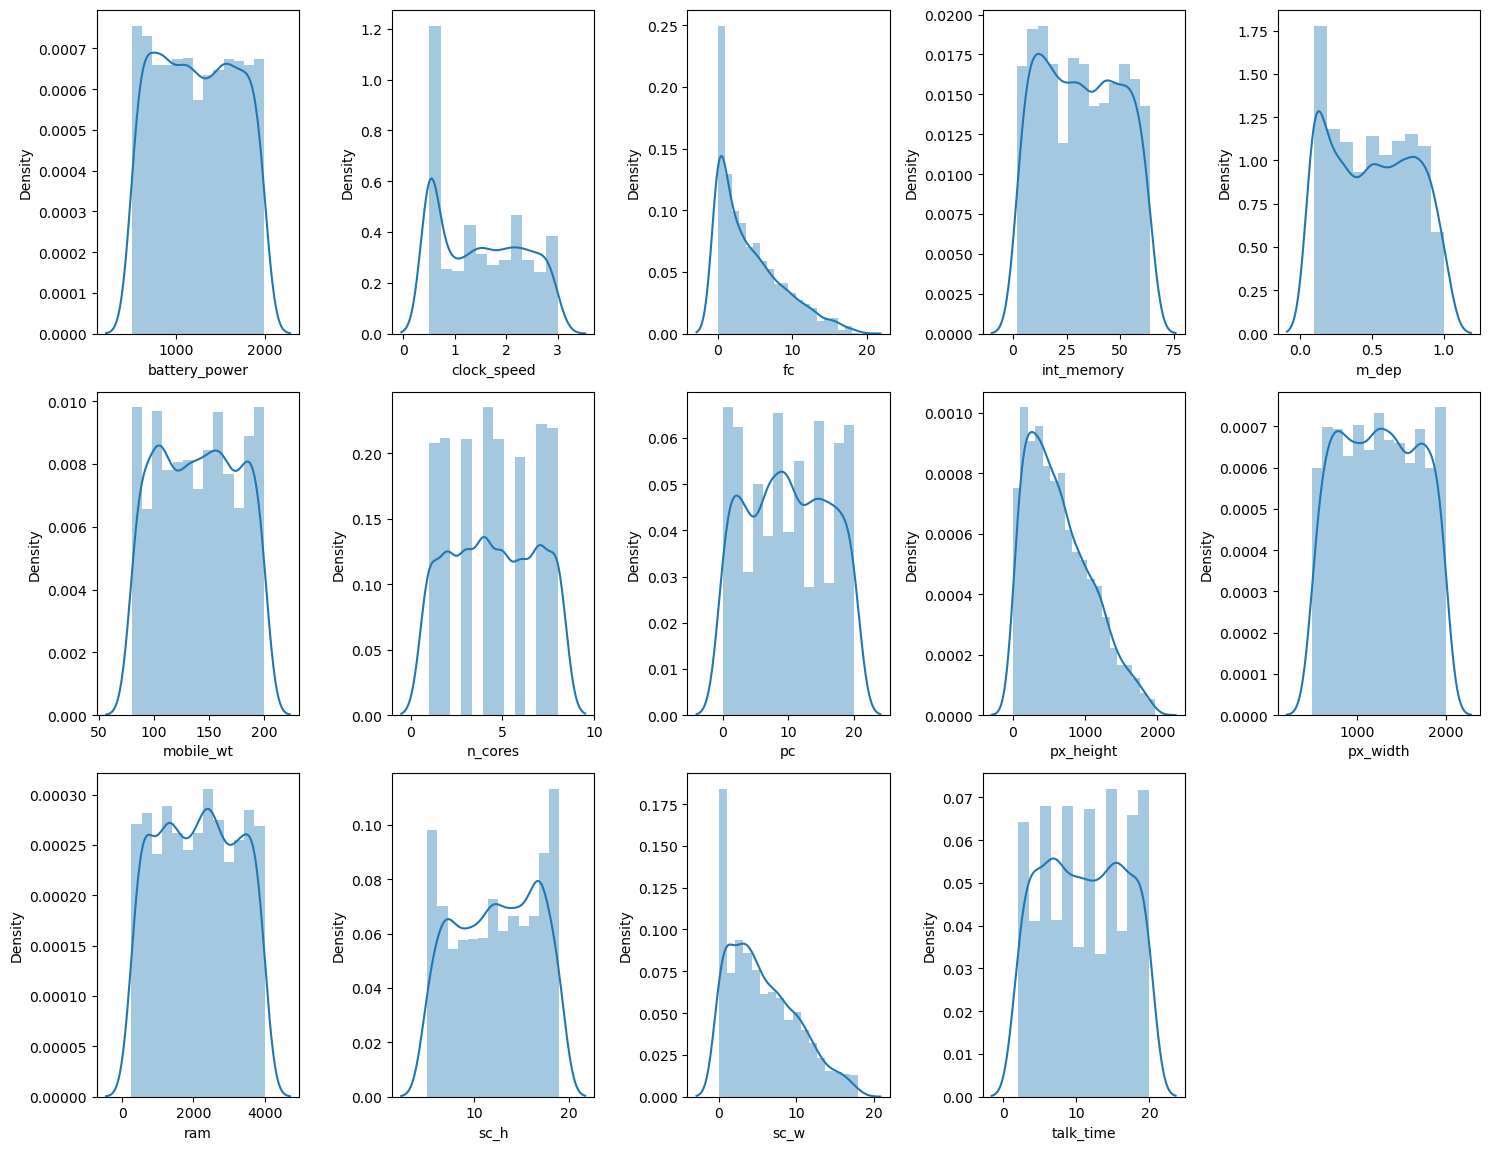

In [48]:
# Check distribution of data

plt.figure(figsize=(15,15))
plotnumber = 1
for i in df_num:
    plt.subplot(4, 5, plotnumber)
    sns.distplot(x = df_num[i],kde = True)
    plotnumber = plotnumber+1
    plt.xlabel(i,fontsize=10)
plt.tight_layout()

None of the column is normally distributed.
Distribution of fc,sc_w columns is right skewed.
Distribution battery_power,clock_width,int_memory,m_dep,mobile_wt,pc,px_width,ram,sc_h,sc_w,talk_time columns has flat kurtosis

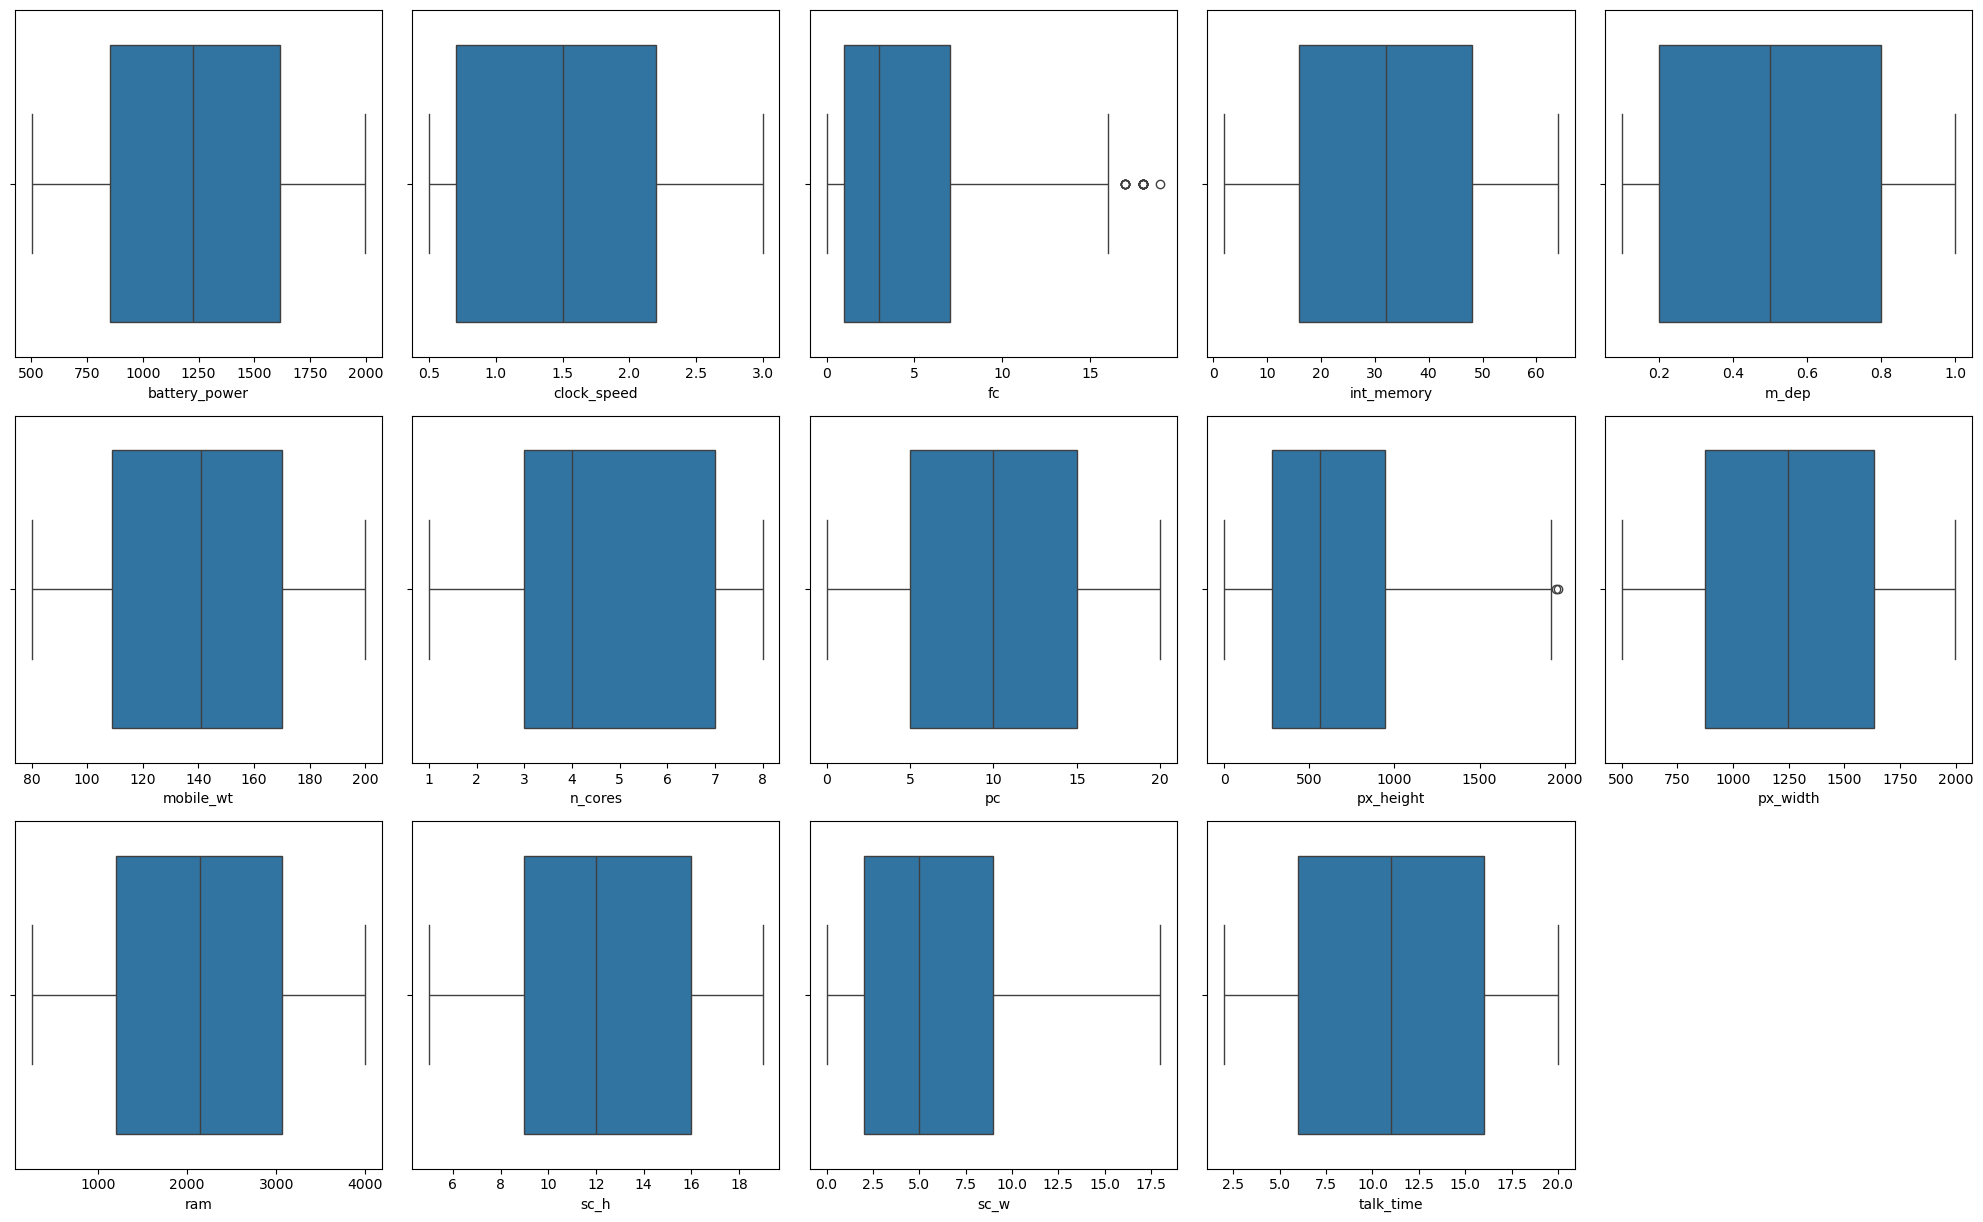

In [49]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df_num:
    plt.subplot(5,5,plotnumber)
    sns.boxplot(x=df_num[i])
    plotnumber=plotnumber+1
plt.tight_layout()

In [50]:
def wisker(columns):
    q1,q3=np.percentile(columns,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [51]:
lw,uw=wisker(df.fc)

In [52]:
print(lw,uw)

-8.0 16.0


In [53]:
lw,uw= wisker(df.px_height)

In [54]:
print(lw,uw)

-710.875 1942.125


In [55]:
np.median(df.fc)

3.0

In [56]:
np.median(df.px_height)

564.0

In [57]:
df.loc[df.fc > 16,'fc']=np.median(df.fc)

In [58]:
df.loc[df.px_height > 1942,'px_height']=np.median(df.px_height)

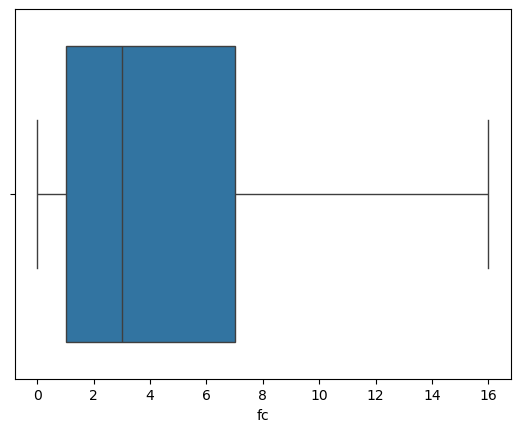

In [59]:
#boxplot after outlier treatment
sns.boxplot(x=df.fc) 
plt.show()

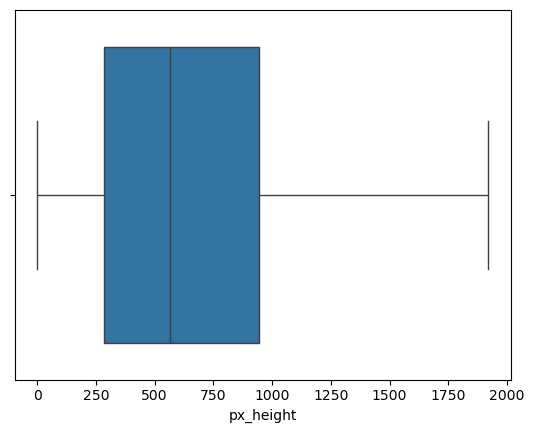

In [60]:
#boxplot after outlier treatment
sns.boxplot(x=df.px_height) 
plt.show()

### Encoading

There is no string data values in features,so no need encoading

## Feature selection

In [61]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.037771,0.014758,-0.008402,-0.000653,-0.029959,-0.021695,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.005393,-0.010080,-0.041533,0.026351,-0.002952,-0.019565,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.011280,-0.011959,-0.009476,0.003443,-0.029078,-0.004461,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.026450,-0.022219,0.014291,0.041072,-0.011949,-0.006568,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,0.583533,-0.028864,-0.014033,0.019830,0.000701,-0.001479,-0.008712,-0.003838,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,0.005236,-0.021135,0.007448,0.007313,0.027166,0.033128,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.039441,0.007208,-0.008335,0.032813,0.037771,0.006975,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.020418,0.024193,0.023566,-0.009434,-0.025348,-0.012754,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.011963,0.003363,0.000090,-0.002581,-0.033855,-0.033610,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,0.000437,-0.008126,0.024480,0.004868,-0.000315,0.022041,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [1]:
# Checking Correlation with heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True , cmap='RdYlGn')

NameError: name 'plt' is not defined

<Axes: title={'center': 'Correlation with target'}>

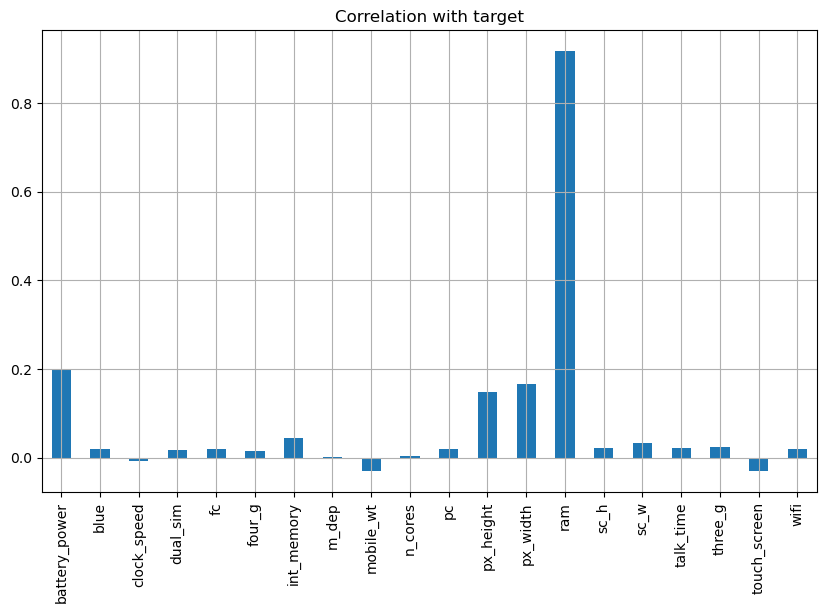

In [63]:
df.drop('price_range', axis=1).corrwith(df.price_range).plot(kind='bar', grid=True, figsize=(10, 6), 
                                                   title="Correlation with target")

In [64]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,price_range,ram,0.917046
1,ram,price_range,0.917046


Ram is highly correlated with our price range. May be one the most important factor in determining the price.
Batery power,px_height, px_width slightly correlated with price range.
pc is correlated with fc.
three_g and four_g are moderately correlated.
sc_h and sc_w are moderately correlated. We will try to change them into a single variable.
px_width and px_height are moderately correlated. We will try to change them into a single variable.

clock_speed, m_dep, touch_screen, mobile_wt has very less corelation with price

## Model Creation

In [17]:
x=df.drop('price_range', axis=1)
y= df.price_range

#### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split (x, y, test_size=0.20, random_state=18)

In [20]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
price_range
3    412
0    403
2    394
1    391
Name: count, dtype: int64
Distribution of traget variable in test set
price_range
1    109
2    106
0     97
3     88
Name: count, dtype: int64


In [41]:
## training and testing data shape

print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(1600, 20)
(1600,)
------------Test Set------------------
(400, 20)
(400,)


### Balancing

The dataset is balanced so no need to do balancing the data

### Scalling(feature normalization)

In [31]:
df_num.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
ms=MinMaxScaler()

In [43]:
x_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w',
         'talk_time']]=ms.fit_transform(x_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram'
        ,'sc_h','sc_w','talk_time']])
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1835,0.787575,1,0.28,1,0.315789,1,0.564516,0.666667,0.733333,0.428571,0.35,0.346429,0.487984,0.321486,0.714286,0.166667,0.000000,1,1,0
91,0.985972,1,0.60,1,0.368421,1,0.838710,1.000000,0.758333,0.857143,0.90,0.625510,0.495327,0.458311,0.928571,0.388889,0.666667,1,1,0
383,0.242485,1,1.00,1,0.000000,1,0.838710,0.666667,0.891667,0.142857,0.05,0.064796,0.781041,0.765633,0.928571,0.111111,0.777778,1,1,1
1881,0.869071,1,0.28,1,0.421053,0,0.403226,0.444444,0.300000,0.571429,0.80,0.231122,0.309079,0.435329,0.357143,0.500000,0.277778,1,1,0
749,0.201069,1,0.76,1,0.052632,0,0.693548,0.777778,0.641667,0.285714,0.45,0.662755,0.756342,0.923838,0.214286,0.166667,0.333333,0,0,0


In [44]:
x_test[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w',
         'talk_time']]=ms.fit_transform(x_test[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram'
        ,'sc_h','sc_w','talk_time']])
x_test.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
452,0.604947,0,0.00,1,0.111111,1,0.516129,0.777778,0.150000,0.285714,0.25,0.531348,0.575941,0.979066,0.285714,0.444444,0.000000,1,0,1
361,0.266043,0,0.00,1,0.722222,1,0.887097,0.888889,0.766667,0.142857,0.90,0.411703,0.552419,0.026033,0.428571,0.055556,0.277778,1,1,0
830,0.046791,0,0.04,0,0.055556,1,0.661290,0.444444,0.508333,0.285714,0.40,0.117032,0.184140,0.622652,0.142857,0.277778,0.888889,1,0,0
1989,0.056818,0,0.92,0,0.111111,0,0.209677,0.111111,0.025000,0.285714,0.55,0.125914,0.231855,0.623994,0.500000,0.444444,0.055556,0,0,0
161,0.307487,1,0.40,1,0.555556,0,0.790323,0.222222,0.600000,0.714286,0.80,0.289446,0.075269,0.728395,0.714286,0.333333,0.277778,1,1,1


### Model fitting

### 1 LOGISTIC REGRESSION

In [45]:
# Step:1 importing model library
from sklearn.linear_model import LogisticRegression

In [46]:
# Step:2 Object creation
LR=LogisticRegression()

In [47]:
# Step:3 Fitting the training data
LR.fit(x_train,y_train)

LogisticRegression()

In [48]:
# Step:4 Prediction on training data
LR_train_pred=LR.predict(x_train)

In [49]:
# Step:5 Prediction on testing data
LR_test_pred=LR.predict(x_test)

#### Evaluation of logostic regression

#### Training accuracy of LR

In [50]:
train_acc=accuracy_score(LR_train_pred,y_train)
print('Training accuracy of Logistic regression',train_acc*100)
print('Logistic regression training Classification report: /n',classification_report(LR_train_pred,y_train))

Training accuracy of Logistic regression 93.9375
Logistic regression training Classification report: /n               precision    recall  f1-score   support

           0       0.99      0.94      0.96       425
           1       0.88      0.93      0.91       367
           2       0.89      0.94      0.92       375
           3       1.00      0.95      0.97       433

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



#### Testing accuracy of LR

In [51]:
test_acc=accuracy_score(LR_test_pred,y_test)
print('Testing accuracy of Logistic regression',test_acc*100)
print('Logistic regression training Classification report: \n',classification_report(LR_test_pred,y_test))

Testing accuracy of Logistic regression 93.25
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       104
           1       0.88      0.93      0.91       103
           2       0.89      0.94      0.91       100
           3       0.99      0.94      0.96        93

    accuracy                           0.93       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.93      0.93       400



In [53]:
# crosstab of logistic regression
pd.crosstab(LR_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,96,8,0,0
1,1,97,6,0
2,0,4,92,1
3,0,0,8,87


####  Baging of Logistic Regression

In [52]:
# Step:1 Create logistic regression object
LR_bag = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=LR_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [53]:
# Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 92.75


## 2.KNeighborsClassifier

In [54]:
 # Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier

error_rate = []   # Creating empty list

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
print("Error rate:",error_rate)    

Error rate: [0.635, 0.6575, 0.625, 0.62, 0.5825, 0.585, 0.5675, 0.555, 0.525, 0.5325]


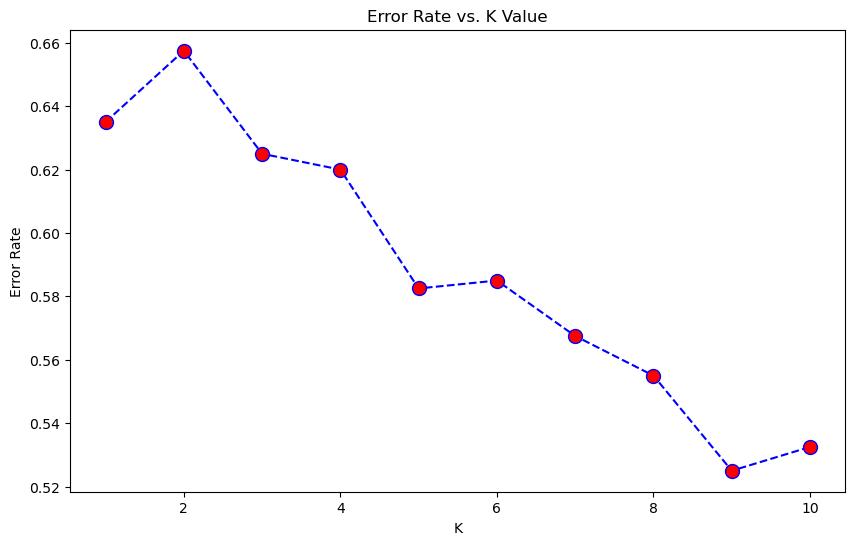

In [55]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [56]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=9)

# Step:4 Fitting the training data
knn1.fit(x_train,y_train)


# Step:5 Prediction on training data
knn_train_predict = knn1.predict(x_train)

# Step:6 Prediction on testing data
knn_test_predict = knn1.predict(x_test)


#### Evaluation of KNN

#### Training accuracy of KNN

In [57]:
train_acc=accuracy_score(knn_train_predict,y_train)
print('Training accuracy of KNN',train_acc*100)
print('Training classification report:\n',classification_report(knn_train_predict,y_train))

Training accuracy of KNN 58.9375
Training classification report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       489
           1       0.49      0.47      0.48       407
           2       0.47      0.48      0.48       386
           3       0.59      0.76      0.66       318

    accuracy                           0.59      1600
   macro avg       0.59      0.59      0.59      1600
weighted avg       0.60      0.59      0.59      1600



#### Testing accuracy of KNN

In [58]:
test_acc=accuracy_score(knn_test_predict,y_test)
print('Testing accuraco of KNN',test_acc*100)
print('Testing classification report:\n',classification_report(knn_test_predict,y_test))

Testing accuraco of KNN 47.5
Testing classification report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.60       128
           1       0.33      0.38      0.35        96
           2       0.40      0.39      0.39       109
           3       0.51      0.67      0.58        67

    accuracy                           0.48       400
   macro avg       0.48      0.49      0.48       400
weighted avg       0.49      0.47      0.48       400



In [59]:
# Cross tab
pd.crosstab(knn_test_predict,y_test)

price_range,0,1,2,3
row_0,,,,
0,67,40,19,2
1,21,36,29,10
2,8,28,42,31
3,1,5,16,45


#### Bagging of KNN

In [60]:
# Step:1 Create  KNeighborsClassifier object
KNN_bag = KNeighborsClassifier()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(base_estimator=KNN_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [61]:
# Evauluation after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 43.0


## 3.Support Vector Machine (SVM)

In [62]:
# Step:1 importing model library
from sklearn.svm import SVC

# Step:2 Object creation
SVM=SVC()

# Step:3 Fitting the training data
SVM.fit(x_train,y_train)

# Step:4 Prediction on training data
SVM_train_pred=SVM.predict(x_train)

# Step:5 Prediction on testing data
SVM_test_pred=SVM.predict(x_test)

#### Evaluation of SVM

#### Training accuracy of SVM

In [63]:
train_acc=accuracy_score(SVM_train_pred,y_train)
print('Training accuracy of SVM',train_acc*100)
print('Training classification report:\n',classification_report(SVM_train_pred,y_train))

Training accuracy of SVM 96.5625
Training classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.96      0.95      0.96       395
           2       0.95      0.94      0.95       398
           3       0.96      0.98      0.97       403

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



#### Testing accuracy of SVM

In [64]:
test_acc=accuracy_score(SVM_test_pred,y_test)
print('Testing accuracy of SVM',test_acc*100)
print('Testing classification report:\n',classification_report(SVM_test_pred,y_test))

Testing accuracy of SVM 86.75
Testing classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        95
           1       0.85      0.79      0.82       117
           2       0.82      0.86      0.84       101
           3       0.92      0.93      0.93        87

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [68]:
# Cross tab
pd.crosstab(SVM_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,87,7,0,0
1,10,95,12,0
2,0,7,88,8
3,0,0,6,80


#### Hyperparameter tuning of SVM

In [65]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear', 'rbf']}

#Step:3 Object creation
SVM2=SVC()

# Step:4 Create Grid search CV with parameter
ran_cv_svm = RandomizedSearchCV(estimator=SVM2,scoring='f1',param_distributions=param_grid,
                                  n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_svm.fit(x_train,y_train)

# Step:6 Get best parameter
svm_best_params = ran_cv_svm.best_params_
print(f"Best parameter: {svm_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [66]:
# Step:7 Create object and place the best paramter
svm_hyper = SVC(**svm_best_params) ## SVC(C=1, gamma=0.1,kernel='rbf')

# Step:8 Fitting the training data
svm_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
svm_hyper_pred = svm_hyper.predict(x_test)

In [67]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(svm_hyper_pred,y_test)
print('Testing accuracy of SVM after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(svm_hyper_pred,y_test))

Testing accuracy of SVM after tuning 91.75
Testing classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        97
           1       0.87      0.89      0.88       107
           2       0.92      0.88      0.90       111
           3       0.94      0.98      0.96        85

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



## 4. GaussianNB (NB)

In [69]:
# Step:1 importing model library
from sklearn.naive_bayes import GaussianNB

# Step:2 Object creation
NB=GaussianNB()

# Step:3 Fitting the training data
NB.fit(x_train,y_train)

# Step:4 Prediction on training data
NB_train_pred=NB.predict(x_train)

# Step:5 Prediction on testing data
NB_test_pred=NB.predict(x_test)

#### Evaluation of NB

#### training accuracy of NB

In [70]:
train_acc=accuracy_score(NB_train_pred,y_train)
print('Training accuracy of NB',train_acc*100)
print('Training classification report:\n',classification_report(NB_train_pred,y_train))

Training accuracy of NB 82.0625
Training classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       402
           1       0.74      0.74      0.74       390
           2       0.73      0.72      0.72       401
           3       0.89      0.90      0.89       407

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



#### testing accuracy of NB

In [71]:
test_acc=accuracy_score(NB_test_pred,y_test)
print('Testing accuracy of NB',test_acc*100)
print('Testing classification report:\n',classification_report(NB_test_pred,y_test))

Testing accuracy of NB 82.0
Testing classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       103
           1       0.71      0.76      0.73       101
           2       0.73      0.77      0.75       100
           3       0.95      0.88      0.91        96

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [77]:
# Cross tab
pd.crosstab(NB_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,90,13,0,0
1,7,77,17,0
2,0,19,78,4
3,0,0,11,84


#### Bagging of NB

In [72]:
# Step:1 importing library and creating bagging object
from sklearn.naive_bayes import GaussianNB

# Step:2 Create NB object
NB_bag = GaussianNB()

bagg = BaggingClassifier(base_estimator=NB_bag,n_estimators=20)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(x_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(x_test)

In [73]:
# Evauluation score after baging
bag_acc=accuracy_score(bagg_predict,y_test)
print('Testing accuracy after baging',bag_acc*100)

Testing accuracy after baging 81.75


## 5.DecisionTreeClassifier (DT)

In [74]:
# Step:1 importing model library
from sklearn.tree import DecisionTreeClassifier

# Step:2 Object creation
DT=DecisionTreeClassifier()

# Step:3 Fitting the training data
DT.fit(x_train,y_train)

# Step:4 Prediction on training data
DT_train_pred=DT.predict(x_train)

# Step:5 Prediction on testing data
DT_test_pred=DT.predict(x_test)

#### Evaluation of DT

#### Training accuracy of DT

In [75]:
train_acc=accuracy_score(DT_train_pred,y_train)
print('training accuracy of DT',train_acc*100)
print('classification report of DT:\n',classification_report(DT_train_pred,y_train))

training accuracy of DT 100.0
classification report of DT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### testing accuracy of DT

In [76]:
test_acc=accuracy_score(DT_test_pred,y_test)
print('testing accuracy of DT',test_acc*100)
print('classification report of DT:\n',classification_report(DT_test_pred,y_test))

testing accuracy of DT 85.5
classification report of DT:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.77      0.88      0.82        96
           2       0.81      0.82      0.82       105
           3       0.92      0.85      0.89        95

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.85      0.86       400



In [84]:
# Cross tab
pd.crosstab(DT_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,87,12,0,0
1,10,83,7,0
2,0,14,87,6
3,0,0,12,82


#### Hyperparameter tuning of DT

In [77]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

#Step:3 Object creation
DT2=DecisionTreeClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_dt = RandomizedSearchCV(DT2, param_grid, scoring='f1', cv = 5, verbose = 3)

# Step:5 Fitting the training data
ran_cv_dt.fit(x_train,y_train)

# Step:6 Get best parameter
dt_best_params = ran_cv_dt.best_params_
print(f"Best parameter: {dt_best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=18, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=18, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=18, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=18, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=18, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=18, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=g

In [78]:
# Step:7 Create object and place the best paramter
dt_hyper = DecisionTreeClassifier(**dt_best_params) ## DecisionTreeClassifier(criterion='gini', max_depth= 1, min_samples_leaf= 1, min_samples_split=2, splitter='best'
# Step:8 Fitting the training data
dt_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
dt_hyper_pred = dt_hyper.predict(x_test)

In [80]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(dt_hyper_pred,y_test)
print('Testing accuracy of DT after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(dt_hyper_pred,y_test))

Testing accuracy of DT after tuning 78.75
Testing classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        94
           1       0.73      0.75      0.74       106
           2       0.77      0.69      0.73       118
           3       0.80      0.85      0.82        82

    accuracy                           0.79       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.79      0.79       400



## 6.RandomForestClassifier(RF)

In [81]:
# Step:1 importing model library
from sklearn.ensemble import RandomForestClassifier

# Step:2 Object creation
RF=RandomForestClassifier(n_estimators=100)

# Step:3 Fitting the training data
RF.fit(x_train,y_train)

# Step:4 Prediction on training data
RF_train_pred=RF.predict(x_train)

# Step:5 Prediction on testing data
RF_test_pred=RF.predict(x_test)

#### Evaluation of RF

#### training accuracy of RF

In [82]:
train_acc=accuracy_score(RF_train_pred,y_train)
print('training accuracy of RF',train_acc*100)
print('classification report of RF:\n',classification_report(RF_train_pred,y_train))

training accuracy of RF 100.0
classification report of RF:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### testing accuracy of RF

In [83]:
test_acc=accuracy_score(RF_test_pred,y_test)
print('testing accuracy of RF',test_acc*100)
print('classification report of RF:\n',classification_report(RF_test_pred,y_test))

testing accuracy of RF 87.75
classification report of RF:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.81      0.86      0.83       102
           2       0.82      0.85      0.84       102
           3       0.95      0.89      0.92        94

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [92]:
# Cross tab
pd.crosstab(RF_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,90,13,0,0
1,7,85,8,0
2,0,11,91,7
3,0,0,7,81


#### Hyperparameter tuning of RF

In [84]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#Step:3 Object creation
RF2=RandomForestClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_rf = RandomizedSearchCV(estimator=RF2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_rf.fit(x_train,y_train)

# Step:6 Get best parameter
rf_best_params = ran_cv_rf.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 28}


In [85]:
# Step:7 Create object and place the best paramter
rf_hyper = RandomForestClassifier(**rf_best_params) ## RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=28)

# Step:8 Fitting the training data
rf_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
rf_hyper_pred = rf_hyper.predict(x_test)

In [86]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(rf_hyper_pred,y_test)
print('Testing accuracy of RF after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(rf_hyper_pred,y_test))

Testing accuracy of RF after tuning 86.0
Testing classification report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       103
           1       0.79      0.84      0.82       102
           2       0.79      0.84      0.82       100
           3       0.94      0.87      0.91        95

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



## 7.GradientBoostingClassifier(GB)

In [87]:
# Step:1 importing model library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation
GB=GradientBoostingClassifier(n_estimators=100)

# Step:3 Fitting the training data
GB.fit(x_train,y_train)

# Step:4 Prediction on training data
GB_train_pred=GB.predict(x_train)

# Step:5 Prediction on testing data
GB_test_pred=GB.predict(x_test)

#### Evaluation of GB

#### training accuarcy of GB

In [88]:
train_acc=accuracy_score(GB_train_pred,y_train)
print('training accuracy of GB',train_acc*100)
print('classification report of GB:\n',classification_report(GB_train_pred,y_train))

training accuracy of GB 99.9375
classification report of GB:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### testing accuracy of GB

In [89]:
test_acc=accuracy_score(GB_test_pred,y_test)
print('testing accuracy of GB',test_acc*100)
print('classification report of GB:\n',classification_report(GB_test_pred,y_test))

training accuracy of GB 91.5
classification report of GB:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.90      0.92      0.91       107
           2       0.87      0.91      0.89       101
           3       0.94      0.90      0.92        92

    accuracy                           0.92       400
   macro avg       0.92      0.91      0.92       400
weighted avg       0.92      0.92      0.92       400



In [132]:
# cross tab
pd.crosstab(GB_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,93,7,0,0
1,4,97,8,0
2,0,5,88,3
3,0,0,10,85


#### hyperparameter tuning of GB

In [90]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid =  {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Step:3 Object creation with parameter
GB2=GradientBoostingClassifier(random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_gb = RandomizedSearchCV(estimator=GB2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_gb.fit(x_train,y_train)

# Step:6 Get best parameter
gb_best_params = ran_cv_gb.best_params_
print(f"Best parameter: {gb_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}


In [91]:
# Step:7 Create object and place the best paramter
gb_hyper = GradientBoostingClassifier(**gb_best_params) ## GradientBoostingClassifier(subsample=1.0 n_estimators=200 min_samples_split=5 min_samples_leaf=2 max_depth=5 learning_rate=0.0)

# Step:8 Fitting the training data
gb_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
gb_hyper_pred = gb_hyper.predict(x_test)

In [92]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(gb_hyper_pred,y_test)
print('Testing accuracy of GB after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(gb_hyper_pred,y_test))

Testing accuracy of GB after tuning 88.25
Testing classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.82      0.90      0.86        99
           2       0.87      0.84      0.85       110
           3       0.91      0.90      0.90        89

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



## 8.XGBoost(Extreme Gradient Boosting)

In [93]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

# Step:2 Fitting the training data
XGB.fit(x_train,y_train)

# Step:3 Prediction on training data
xgb_train_pred = XGB.predict(x_train)

# Step:4 Prediction on testing data
xgb_test_pred = XGB.predict(x_test)

#### Evaluation of XGB

#### training accuracy of XGB

In [94]:
train_acc=accuracy_score(xgb_train_pred,y_train)
print('training accuracy of XGB',train_acc*100)
print('classification report of XGB:\n',classification_report(xgb_train_pred,y_train))

training accuracy of XGB 100.0
classification report of XGB:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       412

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



#### testing accuracy of XGB

In [95]:
test_acc=accuracy_score(xgb_test_pred,y_test)
print('testing accuracy of XGB',test_acc*100)
print('classification report of XGB:\n',classification_report(xgb_test_pred,y_test))

testing accuracy of XGB 90.25
classification report of XGB:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.90      0.89       105
           2       0.89      0.87      0.88       108
           3       0.92      0.91      0.92        89

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [161]:
#cross tab
pd.crosstab(xgb_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,91,7,0,0
1,6,97,5,0
2,0,5,94,5
3,0,0,7,83


#### Hyperparameter tuning of XGB

In [96]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV

# Step:2 Creating dictionary of paramter
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:3 Object creation with parameter
XGB2= XGBClassifier(random_state=42)

# Step:4 Create randomized search cv with parameter
ran_cv_xgb = RandomizedSearchCV(estimator=XGB2,scoring='f1',param_distributions=param_grid,n_iter=60,
                                 cv=5,verbose=3,random_state=42,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:5 Fitting training data on randomized search cv
ran_cv_xgb.fit(x_train,y_train)

# Step:6 Get best parameters
xgb_best_parameter = ran_cv_xgb.best_params_
print(f"Best parameter: {xgb_best_parameter}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter: {'reg_lambda': 12.8, 'reg_alpha': 12.8, 'n_estimators': 150, 'max_depth': 13, 'learning_rate': 0.06, 'gamma': 12.8}


In [97]:
# Step:7 Create object and place the best paramter
##xgb_hyper = XGBClassifier(**xgb_best_parameter) 

##xgb_hyper=XGBClassifier(reg_lambda=12.8, reg_alpha=12.8, n_estimators=150, max_depth=13, learning_rate=0.06, gamma=12.8)

xgb_hyper = XGBClassifier(**xgb_best_parameter)

# Step:8 Fitting the training data
xgb_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
xgb_hyper_pred = xgb_hyper.predict(x_test)

In [98]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(xgb_hyper_pred,y_test)
print('Testing accuracy of XGB after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(xgb_hyper_pred,y_test))

Testing accuracy of XGB after tuning 76.25
Testing classification report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       114
           1       0.62      0.72      0.67        94
           2       0.62      0.72      0.67        92
           3       0.91      0.80      0.85       100

    accuracy                           0.76       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.78      0.76      0.77       400



## 9.MLPClassifier(MLP)

In [99]:
# Step:1 import library
from sklearn.neural_network import MLPClassifier

#Step:2 Object creation
MLP = MLPClassifier()

# Step:3 Fitting the training data
MLP.fit(x_train,y_train)

# Step:4 Prediction on training data
mlp_train_pred = MLP.predict(x_train)

# Step:5 Prediction on testing data
mlp_test_pred = MLP.predict(x_test)

#### Evaluation of MLP

#### training accuracy of MLP

In [100]:
train_acc=accuracy_score(mlp_train_pred,y_train)
print('training accuracy of MLP',train_acc*100)
print('classification report of MLP:\n',classification_report(mlp_train_pred,y_train))

training accuracy of MLP 98.375
classification report of MLP:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       0.98      0.98      0.98       389
           2       0.96      0.99      0.98       385
           3       1.00      0.98      0.99       418

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



#### Testing accuracy of MLP

In [101]:
test_acc=accuracy_score(mlp_test_pred,y_test)
print('testing accuracy of MLP',test_acc*100)
print('classification report of MLP:\n',classification_report(mlp_test_pred,y_test))

testing accuracy of MLP 93.5
classification report of MLP:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       102
           1       0.90      0.96      0.93       102
           2       0.89      0.93      0.91       101
           3       0.98      0.91      0.94        95

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.94       400
weighted avg       0.94      0.94      0.94       400



In [116]:
#cross tab
pd.crosstab(mlp_test_pred,y_test)

price_range,0,1,2,3
row_0,,,,
0,94,6,0,0
1,3,100,4,0
2,0,3,90,2
3,0,0,12,86


#### Hyperparameter tuning of MLP

In [102]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  

# Step:2 Creating dictionary of paramter
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
# Step:3 Object creation with parameter
MLP2=MLPClassifier(max_iter=1000,random_state=42)

# Step:4 Create Grid search CV with parameter
ran_cv_mlp = RandomizedSearchCV(estimator=MLP2,scoring='f1',param_distributions=param_grid,
                                     n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
ran_cv_mlp.fit(x_train,y_train)

# Step:6 Get best parameter
mlp_best_params = ran_cv_mlp.best_params_
print(f"Best parameter: {mlp_best_params}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}


In [103]:
# Step:7 Create object and place the best paramter
##mlp_hyper=MLPClassifier(solver='sgd', learning_rate= 'constant', hidden_layer_sizes= (100,), 'lpha= 0.01, activation='tanh')

mlp_hyper = MLPClassifier(**mlp_best_params)

# Step:8 Fitting the training data
mlp_hyper.fit(x_train,y_train)

# Step:9 Prediction on test data
mlp_hyper_pred = mlp_hyper.predict(x_test)

In [104]:
# Step 10: Evaluate the model
hyper_acc = accuracy_score(mlp_hyper_pred,y_test)
print('Testing accuracy of MLP after tuning',hyper_acc*100)
print('Testing classification report:\n',classification_report(mlp_hyper_pred,y_test))

Testing accuracy of MLP after tuning 71.0
Testing classification report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       121
           1       0.54      0.82      0.65        72
           2       0.44      0.68      0.54        69
           3       0.97      0.62      0.75       138

    accuracy                           0.71       400
   macro avg       0.73      0.72      0.70       400
weighted avg       0.80      0.71      0.73       400



## Model Comparison Report

#### Traning accuracy of all models

In [107]:

# List of model names
models = ['LogisticRegression', 'KNN', 'SVM', 'Naive Bayes', 'DecisionTree', 'RandomForest', 'GB', 'XGBoost', 'MLP']

# List of predictions for each model on the training set
predictions = [LR_train_pred, knn_train_predict, SVM_train_pred, NB_train_pred, DT_train_pred, RF_train_pred, GB_train_pred, xgb_train_pred, mlp_train_pred]

# Initialize list to store accuracy scores
accuracy = []

# Calculate accuracy for each model
for p in predictions:
    accuracy.append(accuracy_score(y_train, p)*100)

# Create DataFrame for training accuracy
training_accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

# Display the DataFrame
print('training_accuracy:\n',training_accuracy_df)

training_accuracy:
                 Model  Accuracy
0  LogisticRegression   93.9375
1                 KNN   58.9375
2                 SVM   96.5625
3         Naive Bayes   82.0625
4        DecisionTree  100.0000
5        RandomForest  100.0000
6                  GB   99.9375
7             XGBoost  100.0000
8                 MLP   98.3750


#### Testing accuracy of all models

In [108]:
# List of model names
models = ['LogisticRegression', 'KNN', 'SVM', 'Naive Bayes', 'DecisionTree', 'RandomForest', 'GB', 'XGBoost', 'MLP']

# List of predictions for each model on the testing set
predictions = [LR_test_pred, knn_test_predict, SVM_test_pred, NB_test_pred, DT_test_pred, RF_test_pred, GB_test_pred, xgb_test_pred, mlp_test_pred]

# Initialize list to store accuracy scores
accuracy = []

# Calculate accuracy for each model
for p in predictions:
    accuracy.append(accuracy_score(y_test, p)*100)

# Create DataFrame for training accuracy
testing_accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

# Display the DataFrame
print('testing accuracy:\n',testing_accuracy_df)

testing accuracy:
                 Model  Accuracy
0  LogisticRegression     93.25
1                 KNN     47.50
2                 SVM     86.75
3         Naive Bayes     82.00
4        DecisionTree     85.50
5        RandomForest     87.75
6                  GB     91.50
7             XGBoost     90.25
8                 MLP     93.50


### Feature Importance

Feature importance is a key concept in machine learning, especially in tree-based models like Random Forests, Gradient Boosting Machines, and XGBoost. It helps in understanding which features (variables) contribute the most to the model's predictions.

<Axes: >

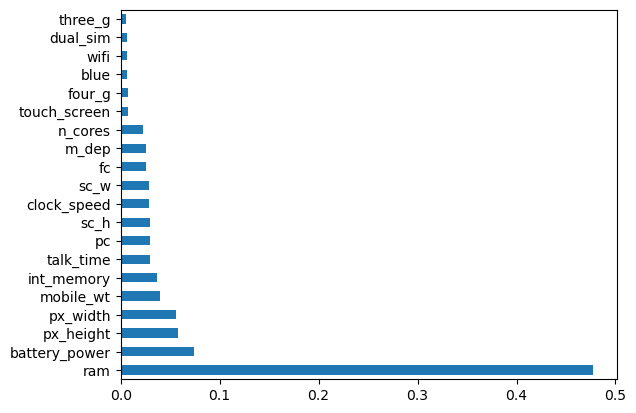

In [152]:
feat_importances = pd.Series(RF.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## CONCLUSION

1.MLP model is performed well on training data with 98.5% accuracy and testing data with 93.50% accuracy 
2 Logistic regression is second best model performed well on training data with 93.98% accuracy and testing data with 93.25% accuracy 
3.SVM model is performed very well on training data with 96.37% accuracy but in testing data model accuracy score is lagging
4.DecisionTree,RandomForest,XGBoost are performed well on training data with 100% accuracy but in testing data accuracy is extrmely lagging   after apply hyperparameter tuning alaso
5.KNN is giving the less results among all the algorithms
6.The top 5 most contribution features are:Ram,batery power,px_height, px_width and mobile_wt
7.From above all model we are select logistic regression model beacuse it is performed very well on training as well as testing data